> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::



# Transformada de Fourier Cuántica 




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $



In [11]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

## La Transformada de Fourier Cuántica

La *transformada de Fourier Cuántica* es una operación unitaria  $U_{TFC}\in{\rm L}(\Hil)$


Su acción transforma los elementos la *base computacional*  a una nueva  *base de Fourier*


$$
U_{TFC}: \ket{x} \to {\ket{\tilde x}} = \frac{1}{\sqrt{N}}\sum_{y}\omega^{xy}\ket{y} =   \frac{1}{\sqrt{N}}\sum_{y} e^{2\pi i  xy /N} \ket{y} 
$$

donde  $~~\omega = e^{2\pi i  /N}~~$ y 
$~~x,\tilde x=0,...,N-1 = 2^n-1~~$    


::::::{admonition} Notar
:class: note


comparar esta expresión con la de la transformada de Walsh-Hadamard

    
$$
W: \ket{x} \to \ket{\tilde x} =  \frac{1}{\sqrt{N}}\sum_{y}(-1)^{xy}\ket{y} =   \frac{1}{\sqrt{N}}\sum_{y} e^{i\pi   xy} \ket{y} 
$$
que es formalmente igual, pero con $\omega = e^{2\pi i/2} = -1$.
    
Ya hemos visto cómo este factor produce *interferencias* interesantes que conducen a soluciones como la del problema de Simon. 
::::::


    
    
El nuevo factor $\omega = e^{2\pi i/N}$ también sirve para producir interferencias destructivas y constructivas interesantes. 

Esto se debe esencialmente a la importante fórmula de [suma nula](../00_Formalismo/01_Numeros_Complejos.ipynb#ejempnc) que hemos estudiado en el tema de números complejos



$$
\fbox{$ \displaystyle
\frac{1}{N} \sum_{y=0}^{N} e^{2\pi i xy/N} = \delta_{x \, 0 {\rm mod}N}$}
$$


::::::{admonition} Ejercicio
:class: tip


utiliza esta expresión para demostrar que, invirtiendo los signos de las fases obtenemos la TFC inversa. Es decir, demuestra que, si 

   
$$
U^{-1}_{TFC}\ket{x}  =  \frac{1}{\sqrt{N}}\sum_{y} e^{-2\pi i  xy /N} \ket{y} 
$$
se sigue que 

    
$$
U_{TFC}^{-1}(U_{TFC} \ket{x}) ) \ket{x}
$$

    
Esto confirma que es un operador unitario $U_{TFC}^{-1} = U_{TFC}^\dagger$.     
::::::


::::::{admonition} Notar
:class: note

    
por supuesto, la operación $U_{TFC}$ no está restringida a elementos de la base computacional. 

Actuando sobre un vector $\ket{f} = \sum_x f(x)\ket{x}$ de componentes $f(x)$ en la base $\ket{x}$ obtendremos otro vector
    

\begin{eqnarray*}
\ket{\tilde f} &=& U_{TCF}\ket{f} = \sum_x f(x) U_{TCF}\ket{x} \nonumber\\
&=& \sum_x f(x) \frac{1}{\sqrt{N}}\sum_y e^{2\pi i xy} \ket{y}\\
&=&  \sum_y\left( \frac{1}{\sqrt{N}}\sum_x f(x) e^{2\pi i xy}\right) \ket{y}\\
    &=& \sum_y \tilde f(y) \ket{y}
\end{eqnarray*}

donde las nuevas componentes $\tilde f(x)$ ahora son

$$
\boxed{\tilde f(y) = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} e^{2\pi i yx} f(x)}
$$
    

Esta regla define lo que *clásicamente* se conoce como la *Transformada de Fourier Discreta* (TFD) del conjunto de datos 


    
$$
\{f(0),f(1),...,f(N-1)\}~ \stackrel{\hbox{TFD}}{\longrightarrow}~ \{\tilde f(0),\tilde f(1),...,\tilde f(N-1)\}$$


::::::


$\bullet$ En general, los elementos de matriz serán evidentemente, las fases



$$
\bra{x} U_{TFC} \ket{y} =  \frac{1}{\sqrt{N}} e^{2\pi i  x y/N} =\frac{1}{\sqrt{N}} \omega^{xy}
 = \frac{1}{\sqrt{N}} \begin{bmatrix}
1&1&1&1&\cdots &1 \\
1&\omega_N&\omega_N^2&\omega_N^3&\cdots&\omega_N^{N-1} \\
1&\omega_N^2&\omega_N^4&\omega_N^6&\cdots&\omega_N^{2(N-1)}\\ 1&\omega_N^3&\omega_N^6&\omega_N^9&\cdots&\omega_N^{3(N-1)}\\
\vdots&\vdots&\vdots&\vdots&\ddots&\vdots\\
1&\omega_N^{N-1}&\omega_N^{2(N-1)}&\omega_N^{3(N-1)}&\cdots&\omega_N^{(N-1)(N-1)}
\end{bmatrix}
$$

::::::{admonition} Ejemplo
:class: tip

 
$\bullet$ Para $n=1 \to \omega = e^{2\pi i /2^1} = -1$ y   la TFC no es otra que la puerta de Hadamard


$$
U_{TFC} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = H
$$

Su acción es 

$$
U_{TFC}\ket{0} = \ket{+}~~~~~~~~~,~~~~~~~~~~  U_{TFC}\ket{1} = \ket{-}
$$

Observamos que los vectores imagen están situados en el plano ecuatorial de la esfera de Bloch

$\bullet$ Para $n=2 \to  \omega = e^{2\pi i/2^2} = i$ y entonces

$$
U_{TFC} =\frac{1}{2}
\begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -i & -1 & i \\ 1 & - 1 & 1 & - 1 \\ 1 & i & -1 & -i  \end{bmatrix}
$$ 



Observar que la suma de cualquier columna o fila que no sean las primeras da cero
    
::::::


::::::{card} 
<b>Teorema</b>:  

^^^
   
Los vectores de la <i>base de Fourier</i> son estados <i>factorizables</i> en productos de estados de un cúbit que se sitúan <i>sobre el ecuador</i> de la esfera de Bloch
::::::


*Base computacional* | *Base de Fourier*
- | -
![alt](https://qiskit.org/textbook/ch-algorithms/images/zbasis-counting.gif) | ![alt](https://qiskit.org/textbook/ch-algorithms/images/fourierbasis-counting.gif)

Animaciones extraídas de [Qiskit Texbook](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)

**Prueba**

*Notación* : un número  $x\in {\mathbb Q} $ puede representarse en base 2

\begin{eqnarray*}
x  
&=&  x_{n-1}2^{n-1}   +   \cdots + x_1 2^1+ x_0 2^0    +  x_{-1}2^{-1} +  \cdots  +   x_{-m}2^{-m}\, \\ \rule{0mm}{10mm}
&=&
x_{n-1} \cdots x_1 x_0\, .\, x_{-1}  \cdots x_{-m} \nonumber\\ \rule{0mm}{10mm}
&=&  x_{n-1} \cdots x_1 x_0 + 0.x_{-1}  \cdots x_{-m} 
\end{eqnarray*}


en particular, si $y\in S_n =[0,...,2^n-1],~$ en base 2 tendríamos

\begin{eqnarray*}
y &=& y_{n-1} \ldots   y_2y_1 y_0 \nonumber\\  \rule{0mm}{12mm}
y/2&~=~&  y_{n-1}...y_2y_1 + 0. y_0 \nonumber\\ \rule{0mm}{12mm}
y/2^2 &~=~&  y_{n-1}...y_2 + 0.y_1 y_0 \nonumber\\ \rule{0mm}{12mm}
&\vdots & \nonumber \\ \rule{0mm}{12mm}
y/2^n &~=~&   0.y_{n-1}y_{n-2}...y_0 \, 
\end{eqnarray*}



Ahora vamos a estudiar la acción de $U_{\rm TFC}$ sobre un elemento $\ket{x} = \ket{x_{n-1}}\ket{x_{n-2}}... \ket{x_0}$
de la base computacional 


\begin{eqnarray*}
 \ket{\tilde x}  ~\equiv ~  U_{\rm TFC}\ket{x}  &=&  \frac{1}{\sqrt{N}} \sum_{y=0}^{2^n-1} e^{2\pi i  xy/2^n}\ket{y} \label{TFC}
\nonumber\\ \rule{0mm}{14mm}
&=&  \frac{1}{\sqrt{N}} \sum_{y_1,...,y_n=\{0,1\}} e^{ 2\pi i x \left( y_{n-1}2^{n-1} + y_{n-2}2^{n-2}  + ... + y_0\right)/2^n } \ket{y_{n-1}}\ket{y_{n-2}}\ldots \ket{ y_0}
\nonumber\\ \rule{0mm}{14mm} 
&=&  \frac{1}{\sqrt{N}} \sum_{y_1,...,y_n=\{0,1\}} e^{2\pi i x \left(\frac{y_{n-1}}{2} + \frac{y_{n-2}}{2^2}  + ... + \frac{y_0}{2^n}\right) } \ket{y_{n-1}}\ket{y_{n-2}}\ldots \ket{ y_0}
\end{eqnarray*}

\begin{eqnarray*}
\hspace{1cm}&=&  \frac{1}{\sqrt{N}} \left( \ket{0} + e^{2\pi i \frac{x}{2}}\ket{1}\right)\left( \ket{0} + e^{2\pi i \frac{x}{2^2}}\ket{1}\right)...\left( \ket{0} + e^{2\pi i \frac{x}{2^n}}\ket{1}\right)
\nonumber\\ 
%\pause
\rule{0mm}{14mm}
&=& \frac{1}{\sqrt{N}} \left( \ket{0} + e^{2\pi i \, 0.x_0}\ket{1}\right)\left( \ket{0} + e^{2\pi i \, 0.x_1x_0}\ket{1}\right)...\left( \ket{0} + e^{2\pi i \, 0.x_{n-1}...x_0}\ket{1}\right)   \nonumber \\
\rule{0mm}{14mm}
&\equiv & ~~ \ket{\tilde x_{n-1}}\ket{\tilde x_{n-2}}\cdots \ket{\tilde x_{0}}   
\end{eqnarray*}



 Hemos usado que las partes enteras de $x$ no contribuyen a las fases


$$
e^{2\pi i x/2} = e^{2\pi i (x_{n-1}...x_1 + 0. x_0)}= e^{2\pi i (x_{n-1}...x_1)}e^{2\pi i \, 0. x_0} = e^{2\pi i\, 0.x_0}
$$

::::::{admonition} Nota
:class: note


La última expresión es tan útil e importante que casi podríamos tomarla como definición de la Transformada de Fourier Cuántica. 

    
-  tal y como prometimos, el resultado es un estado factorizado   $\ket{\tilde x} = \ket{\tilde x_{n-1}}\ket{\tilde x_{n-2}}\cdots \ket{\tilde x_{0}} $ 

    
-  los estados de un cúbit $\ket{\tilde x_k}$  viven en el ecuador de la esfera de Bloch
 

::::::


### Circuito asociado a una TFC

Veamos el circuito


::::{figure} figuras/QFT2.png
:width: 800px
:align: center
::::


Solo involucra 

- la puerta de Hadamard $H$ y

- la puerta *puerta de fase discreta* $R_k \equiv P(\phi = \pi/2^{k-1})$

$$
R_{k} = \begin{bmatrix} 1 & 0 \\ 0 & e^{ 2\pi i\frac{1 }{2^{k}}} \end{bmatrix}  ~~~\Leftrightarrow ~~~R_k\ket{y} = e^{2\pi i\frac{y}{2^k}} \ket{y}
$$

que aparece de forma controlada $\cg{R_k}$.


Será util escribir la *acción* de $\cg R_k$ en la forma siguiente, si $\ket{x}$ es el cúbit de control

$$
\cg{R_k}\ket{x}\ket{y} = \ket{x}R^{x}_{k}\ket{y}  = \ket{x}  e^{2 \pi i   \frac{y}{2^{k}}x}\ket{y}
$$


Vamos a analizar la acción del primer bloque 

$$
(H\ket{x_{n-1}})\ket{x_{n-2}...x_0} =\left( \ket{0} + e^{2\pi i \left(\frac{x_{n-1}}{2}\right)} \ket{1}\right) \ket{x_{n-2}...x_0}
$$

$$
\left(\rule{0mm}{3mm} R_{2}^{x_{n-2}}H\ket{x_{n-1}}\right) \ket{x_{n-2}...x_0}  = 
 \left( \ket{0} + e^{2\pi i \left(\frac{x_{n-1}}{2} + \frac{x_{n-2}}{2^2}\right)} \ket{1}\right) \ket{x_{n-2}...x_0} 
$$

\begin{eqnarray*}
&\vdots& \nonumber\\
\left(\rule{0mm}{5mm}R_{{(n-1)}}^{x_{0}} ... R_{3} ^{x_{n-3}}  R_{2}^{x_{n-2}}H\ket{x_{n-1}}\right) \ket{x_{n-2}...x_0}& =& 
\left( \ket{0} + e^{2\pi i \, \left(\frac{x_{n-1}}{2} + \frac{x_{n-2}}{2^2}+\ldots \frac{x_0}{2^n}\right)}  \ket{1} \right) \ket{x_{n-2}...x_0} \nonumber\\ 
\rule{0mm}{5mm}
 & =& 
\left( \rule{0mm}{5mm}\ket{0} + e^{2\pi i \, 0.x_{n-1}\cdots x_0}  \ket{1} \right) \ket{x_{n-2}...x_0} \nonumber\\ \rule{0mm}{12mm}
& \equiv&  \ket{\tilde x_{0}} \ket{x_{n-2}... x_1x_0} \nonumber
\end{eqnarray*}


El primer bloque ha generado el estado ecuatorial $\ket{\tilde x_0}$ pero ¡*en la posición equivocada*!

Si repetimos el mismo procedimiento con los siguientes cúbits $\ket{x_{n-2}}$ de forma sucesiva, obtendremos finalmente


$$
 \ket{\tilde x_{0}}\ket{\tilde x_{1}}  ... \ket{\tilde{x}_{n-2}} \ket{\tilde x_{n-1}}
$$

que es *casi* el estado que estábamos buscando

La parte final del circuito introduce los operadores de SWAP que rectifican el orden de los cúbits 


$$
\hbox{SWAP}^{\otimes n} \,  (\ket{\tilde x_{0}}  ...  \ket{\tilde x_{n-1}} ) ~=~ 
\ket{\tilde x_{n-1}} ... \ket{\tilde{x}_{0}} ~~ \equiv ~~ \ket{\tilde x}
$$

#### Implementación:

Vamos a generar una puerta TFC que efectúe una Tranformada de Fourier Cuántica

In [6]:
def TFC(n):
    qc = QuantumCircuit(n)    

    for j in reversed(range(n)):
        qc.h(j)
        for k in range(j):
            qc.cp(np.pi/2**(j-k), k, j)
    for j in range(n//2):
        qc.swap(j,n-j-1)

    return qc.to_gate(label='TFC')
        

podemos visualizar el circuito que hemos convertido en una puerta

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


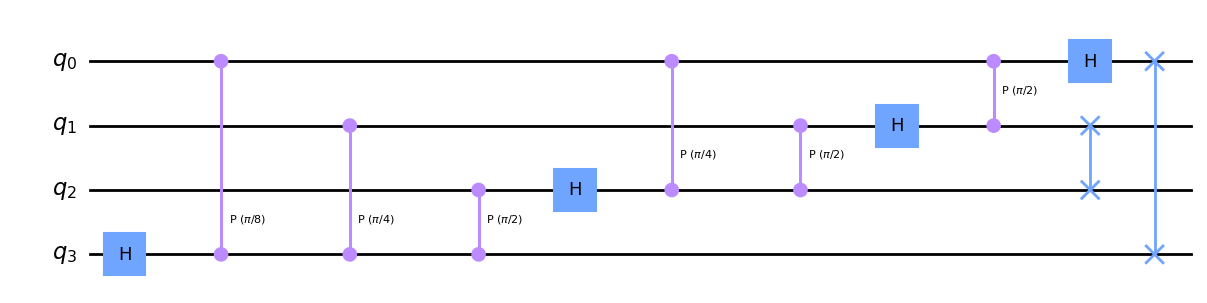

In [7]:
TFC(4).definition.draw('mpl')

y también su inverso

In [6]:
def TFC_adj(n):
    qc = QuantumCircuit(n)    

    for j in reversed(range(n//2)):
        qc.swap(j,n-j-1)            
    for j in range(n):
        for k in reversed(range(j)):
            qc.cp(-2*np.pi/2**(j-k+1), k, j)
        qc.h(j)

    return qc.to_gate(label='TFC_adj')

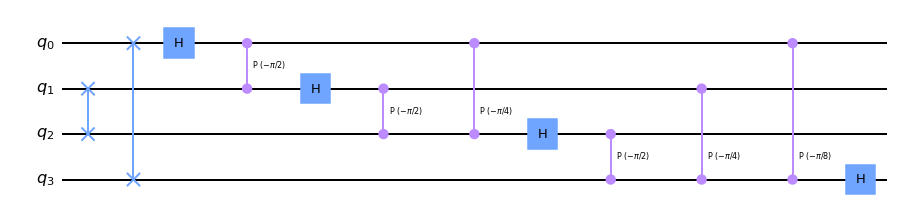

In [7]:
TFC_adj(4).definition.draw('mpl')

In [ ]:
TFC(4).inverse().definition.draw('mpl')

Ahora podemos inicializar un estado y obtener el estado TFC asociado

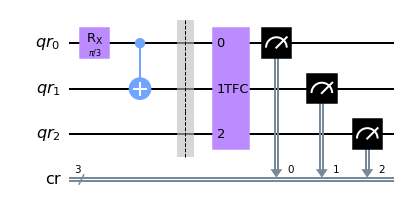

In [7]:
# Creamos el circuito 
num_qubits=3
qr = QuantumRegister(num_qubits,name='qr')
cr = ClassicalRegister(num_qubits,name='cr')
qc = QuantumCircuit(qr,cr,name="QFT")

# Inicialización 1 de un estado de entrada
qc.rx(np.pi/3,0)
qc.cx(0,1)
#qc.x(0)

# Inicialización 2 de un estado de entrada
#qc.h(range(num_qubits))

qc.barrier()
        
# añadimos la TFC
qc.append(TFC(num_qubits),qr[:])

qc.measure(qr,cr)

qc.draw(output='mpl')

Ahora puedes variar el estado de entrada y obervar el resultado a la salida. 

Por ejemplo la TFC del estado superposición  uniforme  $\ket{+\ldots+}= \frac{1}{\sqrt{N}}\sum_{i} \ket{i}$ es el estado $|0 \ldots 0>$



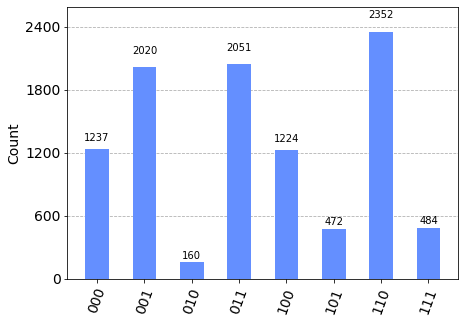

In [9]:

from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

M_simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc,backend=M_simulator,shots =10000 ).result().get_counts()
plot_histogram(counts)

Es importante correr este circuito para distintos estados iniciales

::::::{admonition} Nota
:class: note

    
-  El número de puertas que hemos necesitado es $n$ puertas de Hadamard y $n(n-1)/2$ fases controladas $\cg{R}$. En total esto es un número de orden ${\cal O}(n^2)$. 

 Clásicamente, el algoritmo más eficiente para calcular
la Transformada de Fourier Discreta (TFD) precisa de ${\cal O}(n 2^n)$ por tanto la TFC transforma un problema de tipo  $NP$ en uno de tipo $P$.


    
-  En realidad no hemos calculado la TFC, ya que del estado final no podemos deducir las fases  de los elementos de la base separadamente, lo cuál constituye la transformada de Fourier del qubit de entrada.

    
-  Por tanto, el punto estará en ser capaces de <b>encontrar problemas</b> en los que la TFC sea un ingrediente que aporte una ventaja exponencial

::::::


## Búsqueda de un período

Una aplicación directa de la transformada de Fourier cuántica tiene que ver con funciones $f: S_n \to S_{m}$ periódicas. 


**Promesa:** $f: S_n \to S_{m}$ es suprayectiva con un sólo período $f(x+P) = f(x)$. 

**Problema**:  encontrar $P$ con un numero mínimo de consultas al oráculo.






-  Para realizar los cálculos exactos supondremos que $~P~$ divide  a $N=2^n$. Existe por tanto un $M$  tal que  $\Rightarrow PM = N$.



-  El requisito de divisibilidad se puede relajar, es decir, basta con que  $N-M < P M \leq N = 2^n $. Esto sólo lo estudiaremos numéricamente.



Clásicamente necesitaríamos evaluar $f$ un número de veces del orden de $2^n/2$ para discernir entre las dos ultimas posibilidades $P=N/2$ de $P=N$.



::::::{admonition} Nota
:class: note


Adviértase la diferencia con el problema de Simon, donde la periodicidad era $f(x+r) = f(x)$ para $x+r$ una suma <i>bit a bit</i> mod 2 
::::::


Comencemos analizando el algoritmos como si se tratase del problema de Simon


\begin{eqnarray*}
\ket{\Psi} &=& U_f (W\otimes I) \ket{0}_n  \ket{0}_m  \nonumber\\ \rule{0mm}{15mm}
&=& \rule{0mm}{8mm}U_f   \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}_n\ket{0}_m \nonumber\\ \rule{0mm}{15mm}
&=&   \rule{0mm}{7mm} \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}_n\ket{f(x)}_m \rule{0mm}{15mm}
\end{eqnarray*}


Veamos el caso $N/P\in {\mathbb Z}$, es decir, $P$ divide a $N$ en un número de tramos $M=N/P$ entero.



Rescribamos el entero $x\in S_n$ en la forma siguiente: $~ x = lP +p~ = 0,\ldots, MP-1$, donde $~p=0,\ldots,P-1~$ y $~l=0,\ldots,M-1~$.



\begin{eqnarray*}
\ket{\Psi} &=& \rule{0mm}{7mm} \frac{1}{\sqrt{N}}  \sum_{p=0}^{P-1}\sum_{l=0}^{M-1}\ket{lP + p}\ket{f(lP+p)}\nonumber\\ \rule{0mm}{15mm}
&=& \rule{0mm}{7mm}  \frac{1}{\sqrt{N}} \sum_{p=0}^{P-1}\left(\sum_{l=0}^{M-1}\ket{lP + p}\right)\ket{f(p)} 
\end{eqnarray*}



donde la última igualdad se sigue aplicando la condición de periodicidad de $f$. 



Debido a esta propiedad, 
si una evaluación del segundo registro da como resultado $\ket{f(p_0)}$, el estado al que colapse el primer
registro es  una superposición normalizada 

$$
\ket{\Psi'} = \frac{1}{\sqrt{M}}  \sum_{l=0}^{M-1}\ket{ lP + p_0}\, .
$$

A continuación efectuamos sobre este estado una transformación de Fourier cuántica, usando que $N/P = M$



\begin{eqnarray*}
\ket{\Psi'} = U_{\rm TFC} \ket{\Psi'} &=& \frac{1}{\sqrt{N M}} \sum_{y=0}^{N-1}   \sum_{l=0}^{M-1}e^{+2\pi i (p_0 + lP)y/N}\ket{y} \nonumber\\ \rule{0mm}{12mm}
&=& \frac{1}{\sqrt{N M}} \sum_{y=0}^{N-1}   e^{+2\pi i p_0 y/N} \left( \sum_{l=0}^{M-1} e^{+2\pi i ly/M}\right) \ket{y}   
\end{eqnarray*}

\begin{eqnarray*}
 &=& \frac{1}{\sqrt{N M}} \sum_{y=0}^{N-1}   e^{+2\pi i p_0 y/N}  \left( \rule{0mm}{3.5mm}M \delta_{y/M, s}\right) \ket{y} \nonumber\\ \rule{0mm}{15mm}
&=& \sqrt{ \frac{M}{N}}  ~ \sum_{s=0}^{P-1} e^{+2\pi i p_0 sM/N}    \ket{sM}  \nonumber\\ \rule{0mm}{15mm}
&=&\sqrt{ \frac{1}{P} }~ \sum_{s=0}^{P-1} e^{+2\pi i p_0 s/P }    \ket{sN/P}  
\end{eqnarray*}




El **resultado** es una *superposición homogénea* de estados $~\ket{y_s = sN/P}~$ con $s=0,1,...$ 



$$
P(y) = \left\{ \begin{array}{cl} 1/P & \hbox{si} ~ y = s N/P \in [ 0, N/P, 2N/P,..., (P-1)N/P ] \\ 0 & \rule{0mm}{15mm}\hbox{si} ~ y \neq s N/P \end{array} \right.
$$





::::{figure} ./figuras/Period_finding.png
:width: 800px
:align: center
::::





-  Una acción repetida del circuito nos dará la lista completa $\{y_s\} = \{0, N/P, 2N/P,...\}$. 


-  Dividiendo por $N$ obtenemos otra lista $\{\varphi_s\} = \{0,1/P,2/P,...,\}$


-  La extracción de $P$ a partir de elementos de esta lista se puede efectuar mediante la expresión en *fracciones continuas*


### Ejemplo:

Vamos a fabricar una función $f: S_n \to S_{m}$  periódica con período $P$ que se repita $M$ veces, de modo que $M$ = int$(N/P)$. 

Necesitaremos dos registros, para $\ket{x}_n\ket{f(x)}_m$ generales.

In [15]:
def f_periodica(Nn,Nm,P,show_values=True): # hay argumentos Nn y Nm para el caso de funciones de S_n -> S_m
    
    M= int(Nn/P)
    values= np.random.choice(Nm-1,P,replace=False) #seleccionamos P valores aleatorios entre 1 y Np 
    if show_values:
        print('valores de f(x) en un período :',values)
    
    fout=np.zeros(Nn)
    for m in range(M+1):
        for p in range(P):  
            if p + m*P < Nn:
                fout[p + m*P] = values[p]
#    print('tabla binaria de verdad completa de la función f(x):',  fout)
    fout_list = [format(int(i), 'b').zfill(int(np.ceil(np.log2(np.max(fout)+2)))) for i in fout]
    
    return fout_list
      
fout_list = f_periodica(8,8,4,show_values=True)        
print(fout_list)

valores de f(x) en un período : [2 1 5 4]
['010', '001', '101', '100', '010', '001', '101', '100']


Implementamos esta función periódica en un oráculo binario que necesitara sendos registros de $n$ y $m$ cúbits

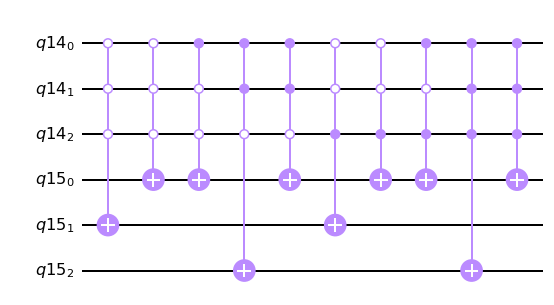

In [12]:
binary_function(fout_list).draw('mpl')

Ahora generamos el *Circuito de Búsqueda de Periodo* y correrlo en dos casos parecidos. 

1. $ n=m=7~\to~N=2^7 ~,~ P = 4 ~~~\hbox{  es decir  } ~~~ N/P = 32 \in {\mathbb Z} $

$\rule{8mm}{0mm}$En este caso tenemos un número exacto de $32$ repeticiones de un período de $P=4$ elementos


2. $ n=m=7~\to N=2^7 ~, ~ P = 5 ~~~\hbox{  es decir  } ~~~ N/P = 25.6 \notin {\mathbb Z} $

$\rule{8mm}{0mm}$En este caso después de 25 repeticiones, aun queda una cadenad de  $0.6 P$ valores  hasta completar $N$.

In [13]:


n=7
#dominio
Nn=2**n
#rango
Nm = N  # esta opción no es obligatoria. Sólo es necesario que N'>P
#período
P =5

print('N = 2^n =',Nn, ' P =', P, ' M =', N/P)

# el oráculo que genera una funcion períodica con valores f(0),f(1),...,f(P-1) que se repiten M veces (aprox)
fout_list = f_periodica(Nn,Nm,P,show_values=True)        
periodic_oracle = binary_function(fout_list).to_gate(label='f(x+P)=f(x)')

qr_in = QuantumRegister(n, name='x')
qr_out = QuantumRegister(n, name='f(x)')
cr_in = ClassicalRegister(n, name='meas_in')
cr_out = ClassicalRegister(n, name='meas_out')
qc = QuantumCircuit(qr_in, qr_out, cr_in,cr_out, name='q')
    

# Aplicamos la puerta de Walsh-Hadamard al primer registro
qc.h(qr_in)
qc.barrier()

# Añadimos el oráculo
qc.append(periodic_oracle,qr_in[:] + qr_out[:])    
qc.barrier()

# Medimos el registro de los cúbits de |f(x)>
qc.measure(qr_out, cr_out)
qc.barrier()

# Aplicamos la Transformada de Fourier al primer registro
qc.append(TFC(n),qr_in)
qc.barrier()

# Finalmente medimos el registro de los inputs |x>
qc.measure(qr_in, cr_in)   

N = 2^n = 128  P = 5  M = 3.0


NameError: name 'f_periodica' is not defined

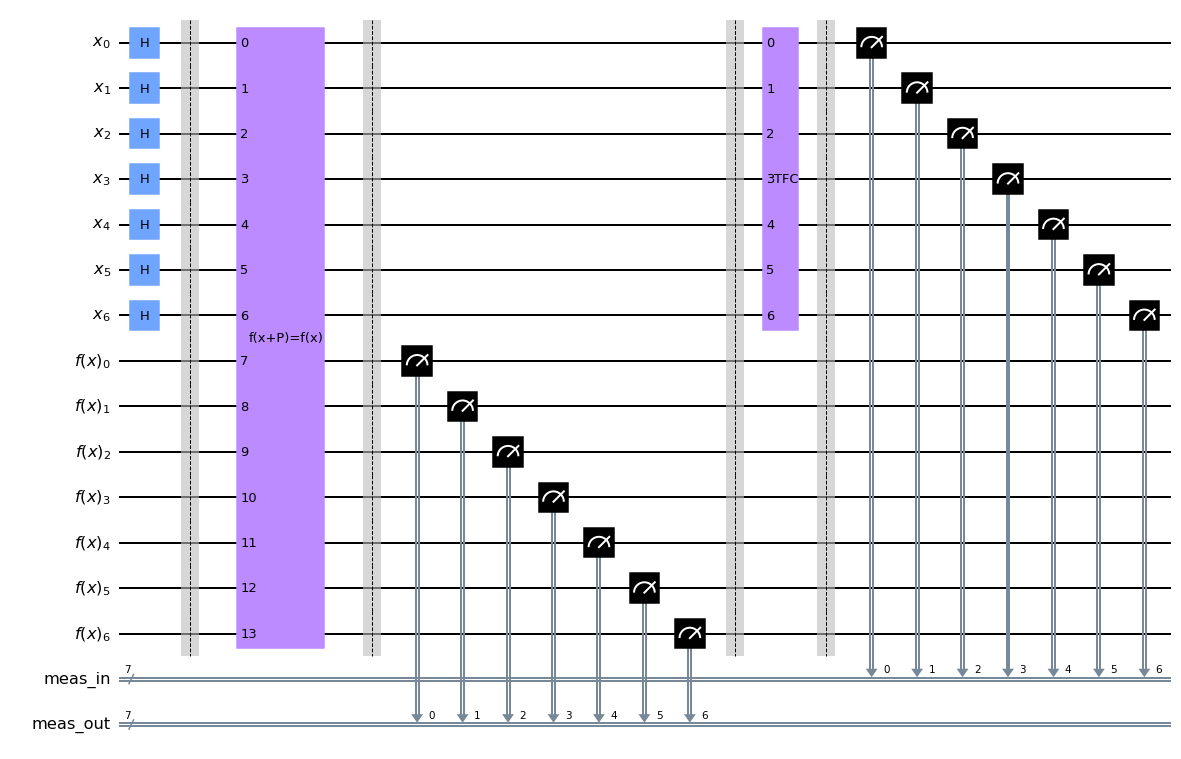

In [34]:
qc.draw('mpl')

In [1]:
from qiskit import Aer, execute

shots_exe = 20000

backend = Aer.get_backend('qasm_simulator')
job     = execute(qc, backend, shots = shots_exe)
result  = job.result()
counts  = result.get_counts()

from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

NameError: name 'qc' is not defined

- Si $N/P$ es un entero la distribución es uniforme en unos pocos valores. Debemos seleccionar los que tienen un primer registro común


- Si $N/P$ no es un entero, observamos que, la distribución está muy picada en torno a unos pocos valores. 

 De haber corrido el circuito una sola vez, la probabilidad de obtener un valor fuera de esos picos es muy baja. Vamos a continuar trabajando con el colectivo de resultados y volveremos sobre esta observación al final. 

Ahora post-seleccionamos las salidas que tienen un mismo valor del primer registro y superan un umbral de probabilidad (número de eventos)


( Cuando $N/p \notin {\mathbb Z} $, variar el umbral para seleccionar los picos de probabilidad)

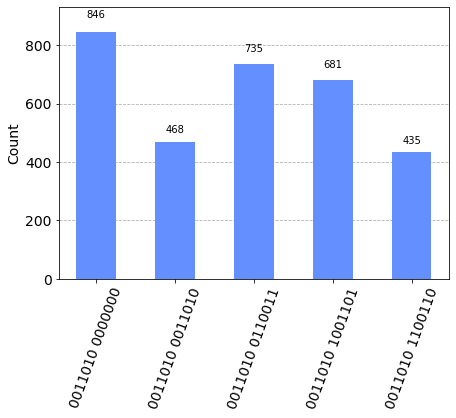

In [19]:
#post-selección

projected_counts = {k: v for k, v in counts.items() if k[:len(k)//2] == list(counts)[2][:n] and v>300 }
#print(projected_counts)
plot_histogram(projected_counts)


 De la lectura del segundo registro obtenemos la lista de valores enteros $\{N_s\}$ que  forman la mejor aproximación a $\{s N/P\}$. 
 
 Dividiendo por $N$, obtendremos la lista $\{\varphi_s\}\in [0,1)$ que mejor aproximan los valores que buscamos $\{s/P\}~, s=1,2,..$.

In [20]:
# extraemos las 'keys' del segundo registro, rechazando el 00...0 que siempre está
Ns_list = sorted([int(keys[n+1:],2) for  keys in projected_counts])[1:] # el +1 es para comerse el espacio p.ej en '101 1101'
print('{Ns} ~ ', Ns_list)

# dividiendo por N
phis_list = [Ns_list[i]/N for i in range(len(Ns_list))]
print('phi_s', phis_list)


{Ns} ~  [26, 51, 77, 102]
phi_s [0.203125, 0.3984375, 0.6015625, 0.796875]


La última parte del post-procesado consiste en averiguar qué par de números enteros, $s$ y $P$ se esconden detrás de la lista $\{\varphi_s\}$ encontrada. 


**Estrategia 1**: simplemente restando elementos sucesivos tenemos una lista 

$$
[(\varphi_{s+1} -\varphi_s)^{-1}]\sim \left[\left(\frac{s+1}{P} - \frac{s}{P}\right)^{-1} \right] =
\left[P \right] \sim   P
$$



In [26]:
P_list = [(phis_list[s+1]-phis_list[s])**(-1) for s in range(len(phis_list)-1)]

print(P_list)

print('el valor entero del promedio =', int(sum(P_list)/len(P_list)))

[5.12, 4.923076923076923, 5.12]
el valor entero del promedio = 5



**Estrategia 2**:

Representar un número racional $a \in {\mathbb Q}$ como un cociente de dos enteros $a = s/P$, es algo que se puede conseguir a partir de su expresión en  [fracciones continuas](https://es.wikipedia.org/wiki/Fracci%C3%B3n_continua#:~:text=C%C3%A1lculo%20de%20una%20fracci%C3%B3n%20continua,-Consideremos%20un%20n%C3%BAmero&text=Para%20calcular%20la%20representaci%C3%B3n%20en,la%20diferencia%20y%20se%20repite)


La clase [Fraction](https://docs.python.org/3/library/fractions.html) de python ya incorpora esta utilidad. 

In [27]:
from fractions import Fraction

[Fraction(phis_list[i]) for i in range(len(phis_list))]

[Fraction(13, 64), Fraction(51, 128), Fraction(77, 128), Fraction(51, 64)]

El método puede producir respuestas erróneas por dos razones:

-  que $s$ sea divisor de $P$


-  que $\varphi_s \sim s/P$. En ese caso, el método arroja dos enteros $s'/P'$ mayores que $s'>s$ y $P'>P$.



El segundo caso es el genérico cuando $N/P \notin {\mathbb Z} $ y se controla limitando el valor de $P$ en el cociente $s/P$ que debe aproximar $\varphi_s$.

In [40]:
[Fraction(phis_list[i]).limit_denominator(20) for i in range(int(len(phis_list)))]

[Fraction(1, 5), Fraction(2, 5), Fraction(3, 5), Fraction(4, 5)]



**En cualquier caso**:  *verificar* si un valor es *solución o no* es una tarea que clásicamente se puede realizar de forma eficiente. 

::::::{admonition} Nota (Advertencia!) 
:class: note


 El algoritmo de búsqueda de un periodo permite una ventaja exponencial si no contamos la profundidad del oráculo. 


    
 Sin embargo ya hemos visto en el ejemplo anterior que la forma de construir el oráculo asociado a la función $f(x+P)=f(x)$ pasa por implementar la <i> tabla de verdad </i> de $P$ valores distintos $f(0),....,f(P-1)$. Para un $P$ de ${\cal O}(N)$ vemos que la <i>profundidad del oráculo</i> crece de forma exponencial.
   
 
    
Por tanto, la ventaja cuántica sólo existe en los casos de funciones  sea posible implementar mediante un oráculo de forma que su profundidad crezca polinómicamente con el tamaño del registro $n$.
::::::
